# Koda za projektno nalogo PR
## Tehnični pregledi motornih vozil v Sloveniji

### Skupina
* Leon Macur - 63180190
* Kevin Mohar - 63180209

### Podatki
podatki -> (OPSI: odprti podatki) https://podatki.gov.si/dataset/rezultati-tehnicnih-pregledov-motornih-vozil \
datoteke -> Porocilo o uspesnosti tp (2019, 2018, 2017, 2016, 2015) \
txt -> tp-2019 \
csv -> tp-(2018, 2017, 2016, 2015)

### Organizacija in branje podatkov:

In [1]:
from datetime import datetime
from csv import DictReader
import numpy as np
import matplotlib.pyplot as plt
import operator
import re

def getDat(datoteka):
    dat = []
    i = 0
    with open(datoteka, "r", encoding="utf8") as datRead:
        for datLine in datRead.readlines():
            dat += [[]]
            for beseda in datLine.split(";"):
                dat[i].append(beseda.strip("\"\n"))
            i += 1
    datRead.close()
    return dat

# dats = [2019, 2018, 2017, 2016, 2015]
dats = [getDat('podatki/Porocilo_o_uspesnosti_tp_2019.txt'), getDat('podatki/Porocilo_o_uspesnosti_tp_2018.csv'),
        getDat('podatki/Porocilo_o_uspesnosti_tp_2017.csv'), getDat('podatki/Porocilo_o_uspesnosti_tp_2016.csv'), 
        getDat('podatki/Porocilo_o_uspesnosti_tp_2015.csv')]

# dat[0] <- header
# dat[#>0] <- vrstica (podatki) o vozilu

#### Vpr1:
Kako se je spreminjala uspešnost opravljenega pregleda skozi leta glede na vrsto goriva.

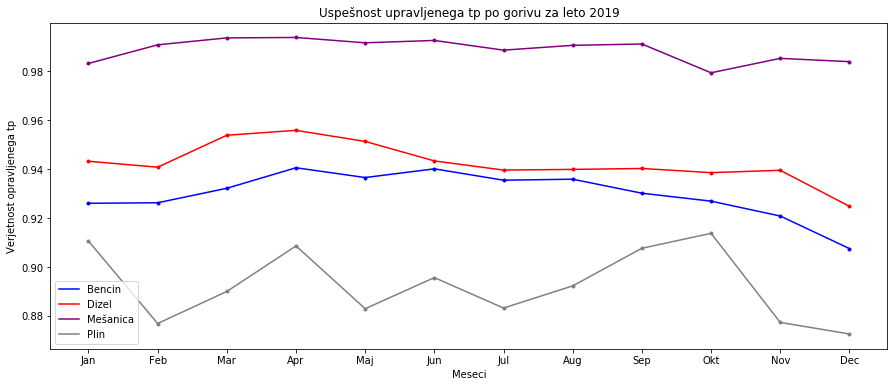

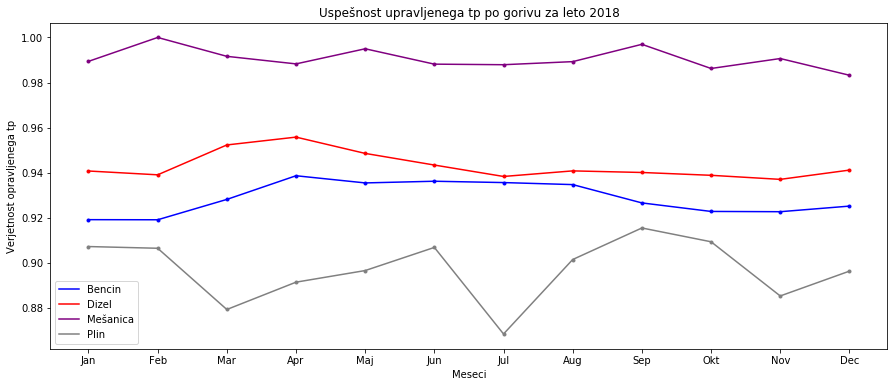

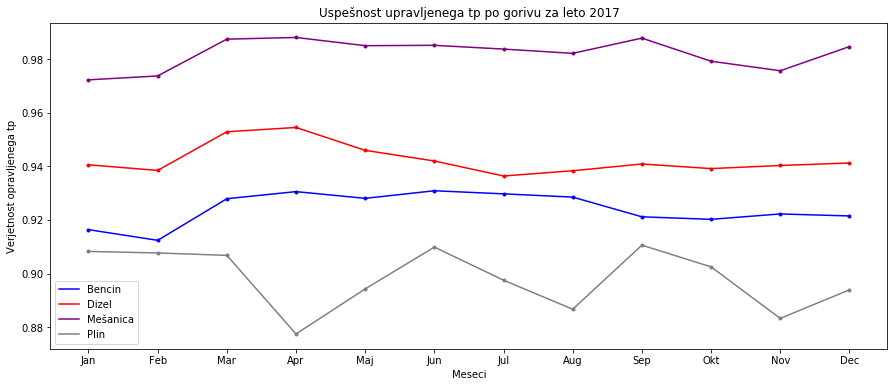

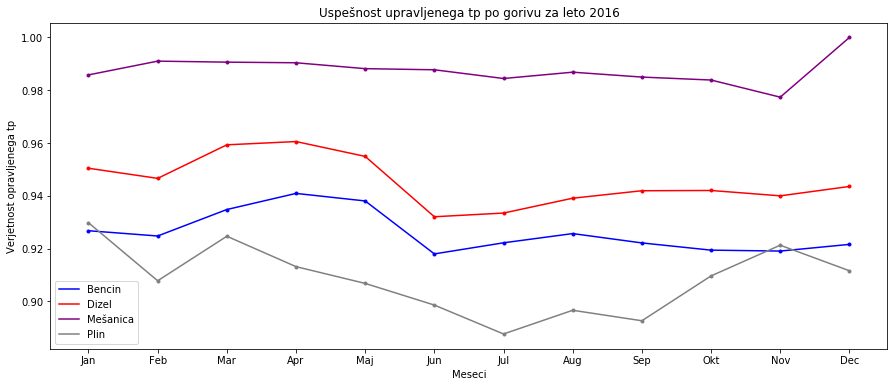

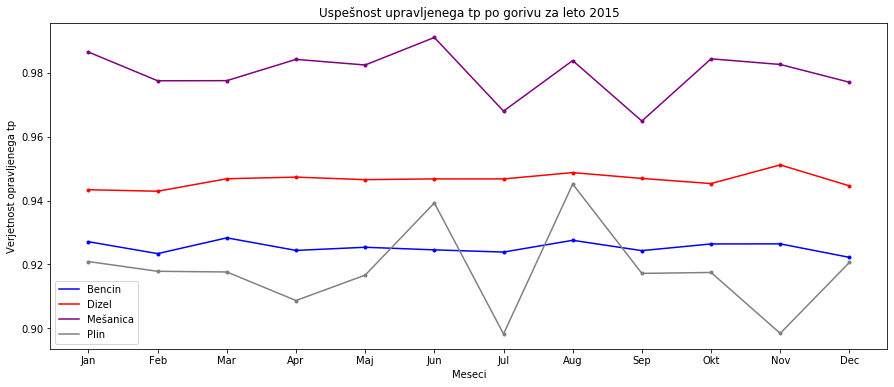

In [2]:
# dat[#>0][0] <- Znamka vozila
# dat[#>0][12] <- Vrsta goriva
# dat[#>0][19] <- Datum pregleda
# dat[#>0][21] <- Status tehničnega pregleda

for range_dat in range(5):
    dictGorivo = {}
    for i in range (1,13):
        dictGorivo[i] = {"b":[0, 0], "d":[0, 0], "m":[0, 0], "p":[0, 0]}

    for vozilo in dats[range_dat]:
            try:
                if range_dat == 0 or range_dat == 4:
                    datum = datetime.strptime(vozilo[19], "%m/%d/%Y").date().month
                else:
                    datum = datetime.strptime(re.sub("[ ]", "", vozilo[19]), "%d.%m.%Y").date().month
                if vozilo[12] == "Bencin":
                    # Ali je vozilo opravil tp
                    if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                        dictGorivo[datum]["b"][0] = dictGorivo[datum]["b"][0] + 1
                        dictGorivo[datum]["b"][1] = dictGorivo[datum]["b"][1] + 1
                    else:
                        dictGorivo[datum]["b"][1] = dictGorivo[datum]["b"][1] + 1
                elif vozilo[12] == "Dizel":
                    # Ali je vozilo opravil tp
                    if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                        dictGorivo[datum]["d"][0] = dictGorivo[datum]["d"][0] + 1
                        dictGorivo[datum]["d"][1] = dictGorivo[datum]["d"][1] + 1
                    else:
                        dictGorivo[datum]["d"][1] = dictGorivo[datum]["d"][1] + 1
                elif vozilo[12] == "Mešanica":
                    # Ali je vozilo opravil tp
                    if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                        dictGorivo[datum]["m"][0] = dictGorivo[datum]["m"][0] + 1
                        dictGorivo[datum]["m"][1] = dictGorivo[datum]["m"][1] + 1
                    else:
                        dictGorivo[datum]["m"][1] = dictGorivo[datum]["m"][1] + 1
                elif "plin" in vozilo[12]:
                    # Ali je vozilo opravil tp
                    if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                        dictGorivo[datum]["p"][0] = dictGorivo[datum]["p"][0] + 1
                        dictGorivo[datum]["p"][1] = dictGorivo[datum]["p"][1] + 1
                    else:
                        dictGorivo[datum]["p"][1] = dictGorivo[datum]["p"][1] + 1
            except:
                pass


    # Izračunamo verjetnosti upravljenega tp za gorvia (po mesecih)
    dictGorivo = {key : [v["b"][0] / v["b"][1], v["d"][0] / v["d"][1],
                         v["m"][0] / v["m"][1], v["p"][0] / v["p"][1]] for key, v in dictGorivo.items()}

    meseci = ["Jan", "Feb", "Mar", "Apr", "Maj", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dec"]

    fig, ax = plt.subplots(figsize=(15, 6))

    ax.plot(meseci, [v[0] for k, v in dictGorivo.items()], "k.", color="blue")
    ax.plot(meseci, [v[0] for k, v in dictGorivo.items()], color="blue", label="Bencin")
    
    ax.plot(meseci, [v[1] for k, v in dictGorivo.items()], "k.", color="red")
    ax.plot(meseci, [v[1] for k, v in dictGorivo.items()], color="red", label="Dizel")
    
    ax.plot(meseci, [v[2] for k, v in dictGorivo.items()], "k.", color="purple")
    ax.plot(meseci, [v[2] for k, v in dictGorivo.items()], color="purple", label="Mešanica")
    
    ax.plot(meseci, [v[3] for k, v in dictGorivo.items()], "k.", color="gray")
    ax.plot(meseci, [v[3] for k, v in dictGorivo.items()], color="gray", label="Plin")

    ax.set_title("Uspešnost upravljenega tp po gorivu za leto " + str(2019-range_dat))
    ax.set_xlabel("Meseci")
    ax.set_ylabel("Verjetnost opravljenega tp")
    plt.legend(loc="lower left")
    plt.show()